# IMDb-Dataset Machine Learning Program

#### Gameplan
- Building a Machine Learning Regression Model that can predict a movie's rating based on the given data
- To achieve this a Random Forest Regressor Model will be used

### Imports and Setup

In [23]:
# Imports
# Data storage 
import pandas as pd
import numpy as np

# Visualisation Tools
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Tools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# own function
from functions import show_grid

# saving the model
import joblib

# loading data
imdb_data = pd.read_csv('imdb_top250_cleaned_for_ml.csv')

# double-check for missing values
print(f'The dataset contains {imdb_data.isnull().sum().sum()} missing values.')
imdb_data.head()

The dataset contains 0 missing values.


,Title,Year,Duration (min),Duration (secs),Rating,Votes,Certification Rating,Title_Length
0,The Shawshank Redemption,1994,142,8520,9.3,3131912,R,24
1,The Godfather,1972,175,10500,9.2,2185484,R,13
2,The Dark Knight,2008,152,9120,9.1,3107811,PG-13,15
3,The Godfather Part II,1974,202,12120,9.0,1469364,R,21
4,12 Angry Men,1957,96,5760,9.0,962954,Approved,12


### Feature Selection Process

##### Creating a Correlation Matrix to check the correlation between the different values 

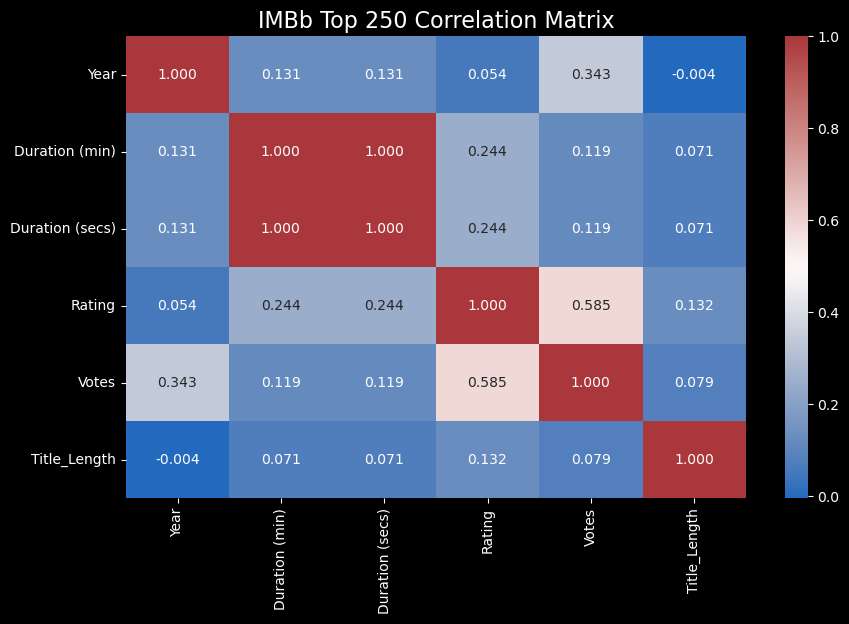

In [2]:
# calculating the correlation matrix
corr_matrix = imdb_data.corr(numeric_only=True)

# visualising the correlation matrix in a Heatmap
# setup and style
plt.style.use('dark_background')
plt.figure(figsize=(10,6))

# setting up the plot
ax = sns.heatmap(data=corr_matrix,
            annot=True,
            cmap='vlag',
            fmt='.3f')

# labeling
ax.set_title('IMBb Top 250 Correlation Matrix', fontsize=16)

plt.show()

##### Conclusion & Observation:
- The most striking observation is that the overall correlation values are quite low. This indicates that there is no strong linear relationship between any single feature and the Rating. The "Answer" isn't obvious.

- Among the available features, Votes shows the strongest positive correlation. This confirms the earlier finding: popularity (engagement) is the best available proxy for quality in this dataset.

-  Both Year and Title Length show near-zero correlation coefficients. In a linear model, these would be considered "noise," but the values will keptto see if the Random Forest can find non-linear patterns 

## Splitting the Data

In [3]:
# setting up prediction target - Rating
y = imdb_data['Rating']

# defining the features
imdb_features = ['Year', 'Duration (secs)', 'Votes', 'Title_Length']
X = imdb_data[imdb_features]

# checking if all values are stored correctly
X.head()

,Year,Duration (secs),Votes,Title_Length
0,1994,8520,3131912,24
1,1972,10500,2185484,13
2,2008,9120,3107811,15
3,1974,12120,1469364,21
4,1957,5760,962954,12


In [4]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# checking the shapes to assure the data has been split correctly
print(f'Training Data:{X_train.shape}')
print(f'Test Data: {X_test.shape}')

Training Data:(200, 4)
Test Data: (50, 4)


### Initialision, Training and Prediction

In [5]:
# defining the RandomForestRegressor
imdb_model = RandomForestRegressor(n_estimators=100, random_state=42)

# fitting the model
imdb_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:
# generating the predictions
y_pred = imdb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R2-Score: {r2}')

Mean Absolute Error: 0.1451400000000012
Mean Squared Error: 0.032435419999999986
R2-Score: 0.4291146860039433


### Visualising the "Why"

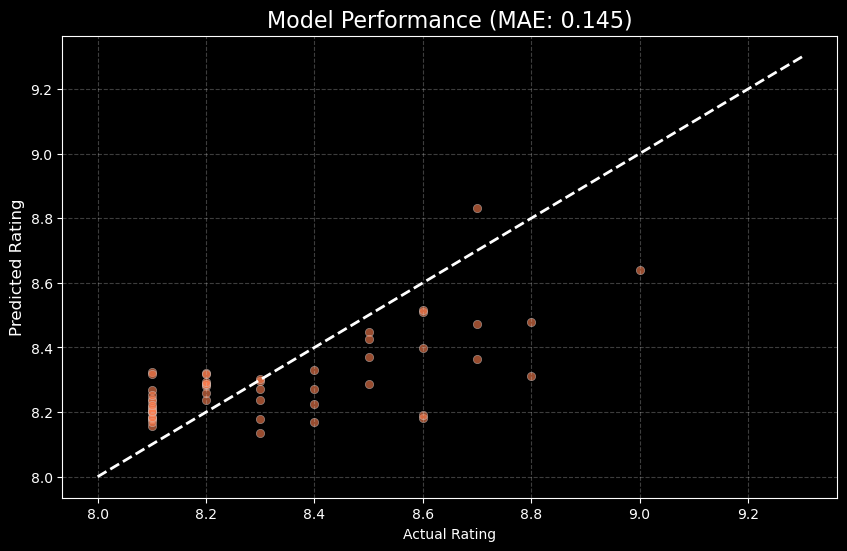

In [7]:
# Visualising the predictions
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=y_test, y=y_pred, color='coral', alpha=0.6, edgecolor='#cccccc')

# drawing the "Perfect Predicition Line"
plt.plot([8, 9.3], [8, 9.3], color='white', linestyle='--', lw=2, label='Perfect Prediction Line')

# showing the grid for readibility
show_grid()

# labeling
ax.set_title(f'Model Performance (MAE: {mae:.3f})', fontsize=16)
ax.set_ylabel('Predicted Rating', fontsize=12)
ax.set_xlabel('Actual Rating')

plt.show()

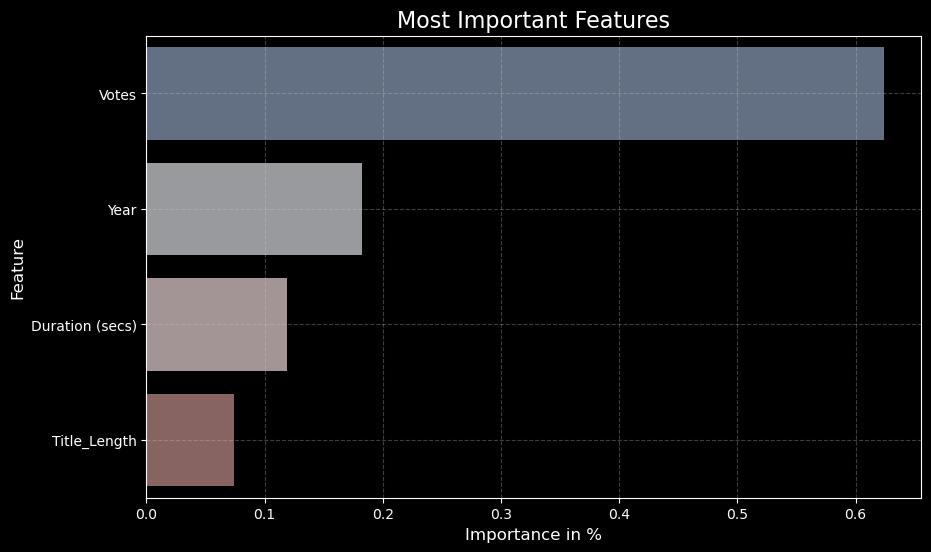

In [22]:
# Feature Importance
importances = imdb_model.feature_importances_
feature_names = X.columns

# creating a dataframe
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance':importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# plotting it
plt.figure(figsize=(10,6))
ax = sns.barplot(data=feature_df, x='Importance', y='Feature', hue='Feature', legend=False, palette='vlag', alpha=0.7)

# showing a grid for readability
show_grid()

ax.set_title('Most Important Features', fontsize=16)
ax.set_xlabel('Importance in %', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)
plt.show()

##### Conclusion & Observations:
-  Contrary to our earlier heatmap (which showed near-zero correlation), the Random Forest identified Year as a significant feature. This proves that the relationship between release year and quality is non-linear—something a simple statistical test missed, but the AI discovered.

- As predicted, Votes is the dominant driver. The model effectively learned that "if millions of people bothered to vote, it's probably a masterpiece."

- The model achieved a Mean Absolute Error (MAE) of 0.145. This means the predictions are, on average, only 0.15 stars away from the real IMDb rating.

In [24]:
# saving the model
joblib.dump(imdb_model, 'imdb_rating_predictor.pkl')

['imdb_rating_predictor.pkl']